In [32]:
#import packages
library(BoolNet)

In [33]:
network <- loadNetwork("indirect_edges_naturally_off.txt")

In [34]:
network

Boolean network with 7 genes

Involved genes:
ANAC032 NIR1 NLP6 NLP7 ARF18 ANR1 DREB26

Transition functions:
ANAC032 = (! ARF18 & ! ANR1 & ! DREB26)
NIR1 = (NLP7 | NLP6) & (! ANAC032 & ! ARF18 & ! ANR1 & ! DREB26)
NLP6 = (! DREB26 & ! ARF18) & (NLP7 | NLP6 | ANR1)
NLP7 = (! ANAC032 & ! DREB26 & ! ARF18) & (NLP6 | NLP7 | ANR1)
ARF18 = (! ARF18 | ! DREB26) & (NLP6 | NLP7)
ANR1 = (NLP7 | NLP6) & ((! ARF18 & ! DREB26) | ! ANR1)
DREB26 = (! ARF18 & ! ANAC032) & (NLP6 | NLP7 | DREB26 | ANR1)

In [ ]:
#From overexpression/mutant lines we know the following:
#NLP6/7 double mutant upregulates NIR1 (T10), ANR1 (T10,T20), ANAC032 (t10) and downregulates NIR1(T20), NLP6 (T10,20), DREB26 (T10,T20), ANAC032 (T20)
#Overall response is NLP6/7 repress NIR1 (T10), ANR1 (T10, 20), ANAC032 (T10) a nd activate NIR1(T20), NLP6(T10,20), DREB26 (T10,20), ANAC032 (T20)

In [ ]:
#Let's just consider T20 data
#NLP6/7 activate ANR1, ANAC032, DREB26, NLP6 (Gaudinier et al 2018)
#ANAC032 represses ANAC032 on low and high nitrate (Gaudinier et al 2018)
#ANAC032 overexpression line - Maki et al 2019 found that ANAC032 overall activates DREB26 (and ANAC032). This conflicts with coexpression data when ANAC032 represses DREB26
#ARF18 TDNA insertion line - on replete nitrate ARF18 represses ANAC032, ARF18 (Gaudinier et al 2018)
#ARF18 overexpressor line - shows ARF18 represses NIR1, NLP6 & 7(https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE121222)


In [ ]:
#Should I add bZIP3 and TGA1 TARSET/coexpression/mutant line data? 

In [ ]:
# From TARSET indirect data we know that ANR1 is an indirect activator of NIR1, while it is a direct repressor - should we add the overall indirect response to the model?

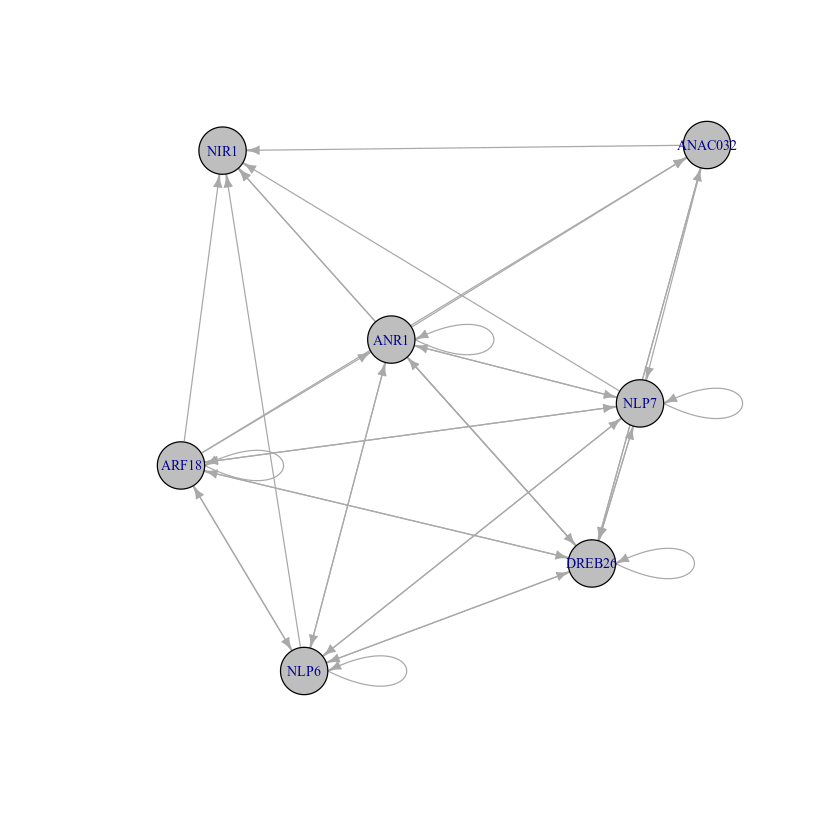

In [35]:
plotNetworkWiring(network)

In [36]:
#generate time series with artificial knockouts and overexpressions
series <- generateTimeSeries(network, numSeries=10, numMeasurements=10, perturbations=1, noiseLevel=0.1)

In [37]:
series

,1,2,3,4,5,6,7,8,9,10
ANAC032,1.06754510,-0.07430116,0.06080952,0.20692025,-0.004221959,-0.084108689,0.09335952,0.199540439,-0.02595681,-0.07680722
NIR1,0.09225116,0.03183948,0.02354413,0.18118568,-0.086173880,0.003336708,-0.06498362,0.007952344,0.15161254,0.01984016
NLP6,0.97602737,0.98479096,1.14247377,0.08160469,0.061609535,-0.116675946,0.02770932,-0.091788026,-0.07416394,0.01146778
NLP7,1.04705552,0.04353955,0.89735752,-0.04441889,-0.123617590,-0.028162923,0.13065346,-0.018085584,-0.10304510,0.15521412
ARF18,-0.01742033,0.11835992,-0.15066294,-0.06351580,0.121397108,0.087503203,-0.08616149,0.188837593,0.07863526,-0.02296913
ANR1,1.07883687,0.87979374,1.13953094,-0.05841227,0.029697327,-0.044931961,0.03873137,0.062713780,-0.08362411,0.18563988
DREB26,0.04282954,-0.12594128,1.27328826,0.98891551,1.006396704,0.891001049,1.00233011,1.168682339,1.08232415,0.91982456
,1,2,3,4,5,6,7,8,9,10
ANAC032,1.07721319,1.05178071,1.20656517,0.904935898,1.00401210,1.065248014,1.052278709,0.849238546,1.102648497,1.02946880
NIR1,0.09926036,0.18025619,0.02933247,-0.048824760,-0.03504468,-0.044532021,0.045883899,0.002095526,-0.168020360,0.01799303


In [38]:
#create start state 10mM nitrate
startState_repleteN <- generateState(network, specs=c("NLP7"=1,"NLP6"=1))

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       0

,1,2,3
DREB26,0,0,0
ANR1,0,0,0
ARF18,1,0,0
NLP7,0,0,0
NLP6,0,0,0
NIR1,0,0,0
ANAC032,0,0,1


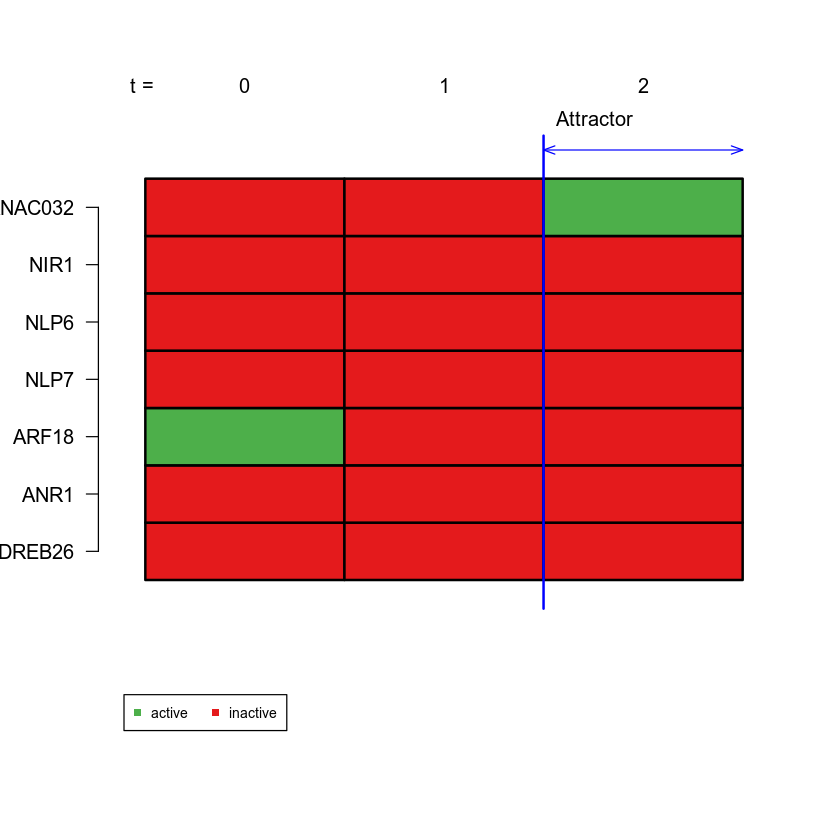

In [39]:
startStates <- generateState(network, specs=c("ARF18"=1))
stateTransition(network, startStates)
plotSequence(network=network, startState=startStates)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       1       1       0       0       1

,1,2,3,4,5
DREB26,0,1,1,0,0
ANR1,1,0,1,0,0
ARF18,0,0,1,0,0
NLP7,0,1,0,0,0
NLP6,0,1,0,0,0
NIR1,0,0,0,0,0
ANAC032,0,0,0,0,1


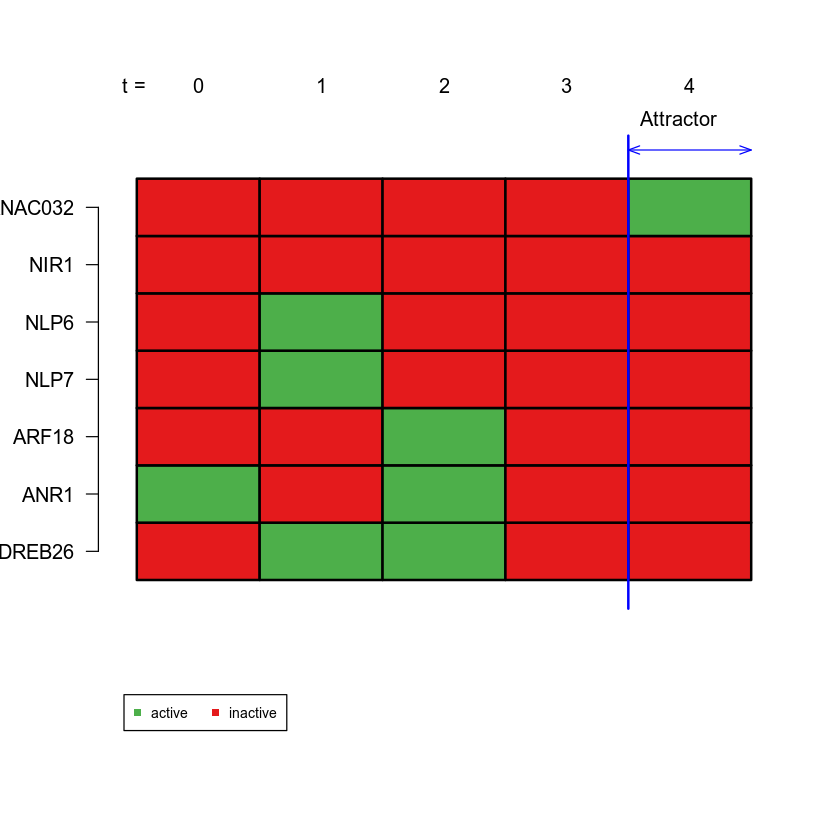

In [40]:
startStates <- generateState(network, specs=c("ANR1"=1))
stateTransition(network, startStates)
plotSequence(network=network, startState=startStates)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      1       1       1       1       1       1       1

,1,2,3,4
DREB26,0,1,0,0
ANR1,0,1,0,0
ARF18,0,1,0,0
NLP7,0,1,0,0
NLP6,1,1,0,0
NIR1,0,1,0,0
ANAC032,0,1,0,1


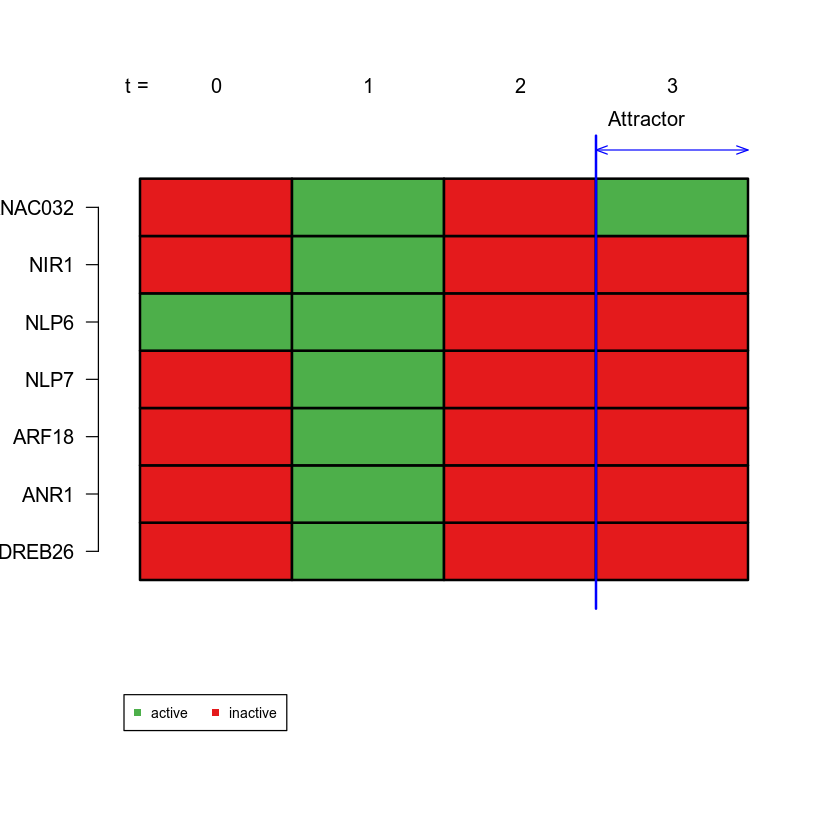

In [41]:
startStates <- generateState(network, specs=c("NLP6"=1))
stateTransition(network, startStates)
plotSequence(network=network, startState=startStates)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       1

,1
DREB26,1
ANR1,0
ARF18,0
NLP7,0
NLP6,0
NIR1,0
ANAC032,0


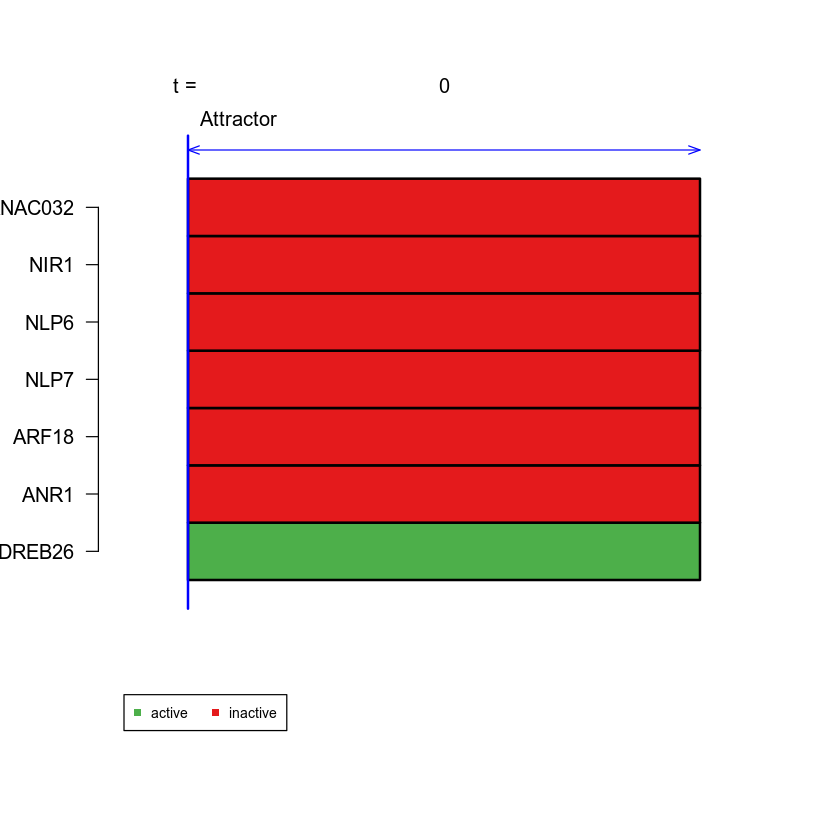

In [42]:
startStates <- generateState(network, specs=c("DREB26"=1))
stateTransition(network, startStates)
plotSequence(network=network, startState=startStates)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       0

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       0

,1,2,3,4
DREB26,0,1,0,0
ANR1,0,1,0,0
ARF18,0,0,0,0
NLP7,1,1,0,0
NLP6,0,1,0,0
NIR1,0,1,0,0
ANAC032,0,1,0,1


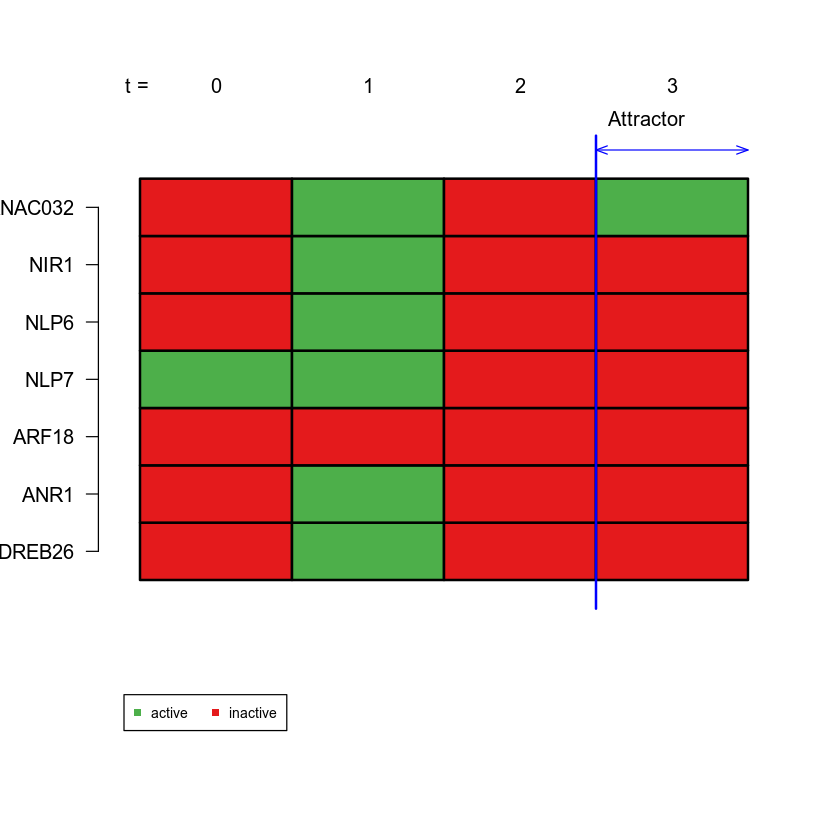

In [43]:
#simulate state transitions
stateTransition(network, rep(1,7))
#knockout ANAC032
knockedOut <- fixGenes(network, "ARF18", 0)
#simulate state transitions
stateTransition(knockedOut, rep(1,7))
#start all genes on 
#try start state with ANR1 turned on
startState <- generateState(knockedOut, specs=c("NLP7"=1))
plotSequence(network=knockedOut, startState=startState)
# #calculate all state transitions until an attractor is reached
# path <- getPathToAttractor(knockedOut, rep(1,7))
# #plot this sequence
# plotSequence(sequence=path)

In [44]:
#knockout ANAC032
knockedOut <- fixGenes(network, "ANAC032", 0)


In [45]:
#simulate state transitions
stateTransition(knockedOut, rep(1,7))

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       0

In [46]:
# #create function to test different start  states
# start_states <- function(gene,state,network) {
#     startStates <- generateState(network, specs=c(gene=state))
#     stateTransition(network, startStates)
#     plotSequence(network=network, startState=startStates)
# }

In [47]:
# start_states("ANR1",1,network)

In [48]:
#try start state with ANR1 turned on
startState_anr1_on <- generateState(network, specs=c("ANR1"=1))

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       1       1       0       0       1

,1,2,3,4,5
DREB26,0,1,1,0,0
ANR1,1,0,1,0,0
ARF18,0,0,1,0,0
NLP7,0,1,0,0,0
NLP6,0,1,0,0,0
NIR1,0,0,0,0,0
ANAC032,0,0,0,0,1


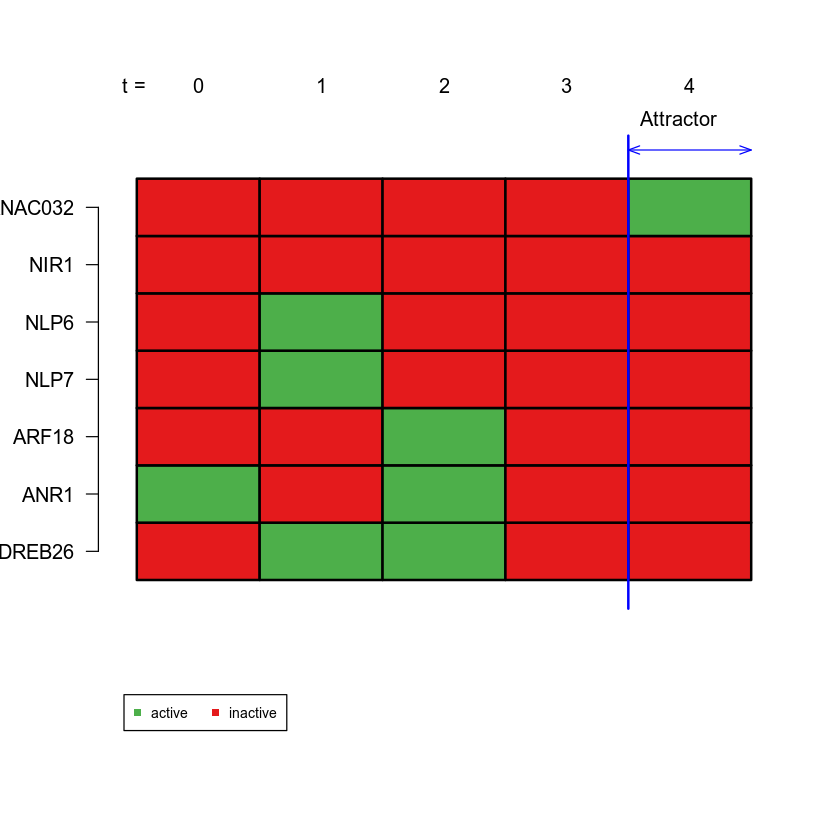

In [49]:
#generate state transitions based on start state
stateTransition(network, startState_anr1_on)
plotSequence(network=network, startState=startState_anr1_on)

In [50]:
#try start state with ANR1 turned on
startState_anr1_off <- generateState(network, specs=c("DREB26"=1,"NLP7"=1,"NLP6"=1, 'ANAC032'=1, "ARF18"=1, 'NIR1'=1))

In [51]:
#generate state transitions based on start state
stateTransition(network, startState_anr1_off)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       1       0

,1,2,3,4,5,6
DREB26,1,0,1,1,0,0
ANR1,0,1,0,1,0,0
ARF18,1,0,0,1,0,0
NLP7,1,0,1,0,0,0
NLP6,1,0,1,0,0,0
NIR1,1,0,0,0,0,0
ANAC032,1,0,0,0,0,1


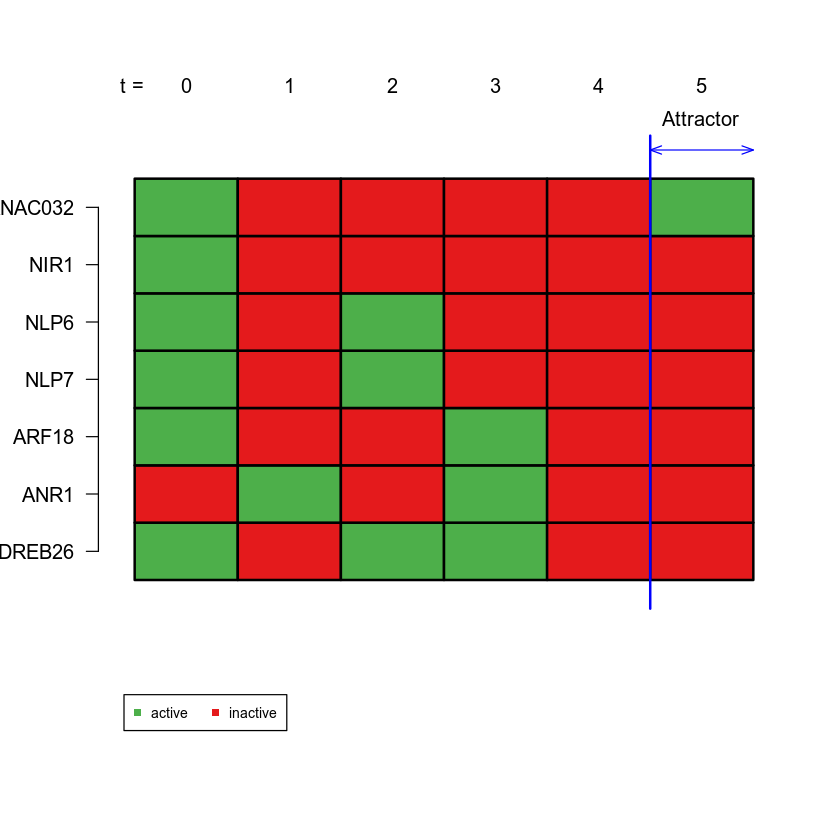

In [52]:
plotSequence(network=network, startState=startState_anr1_off)

In [53]:
#generate state transitions based on start state
stateTransition(network, startState_repleteN)

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      1       1       1       1       1       1       1

,1,2,3,4
DREB26,0,1,0,0
ANR1,0,1,0,0
ARF18,0,1,0,0
NLP7,1,1,0,0
NLP6,1,1,0,0
NIR1,0,1,0,0
ANAC032,0,1,0,1


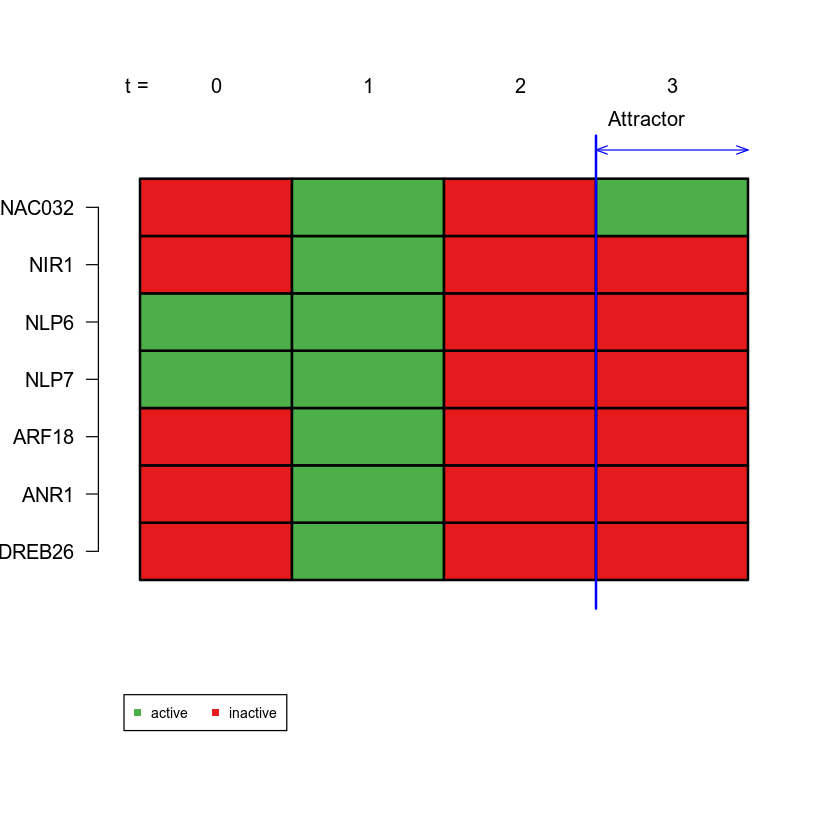

In [54]:
plotSequence(network=network, startState=startState_repleteN)

In [55]:
#simulate state transitions
stateTransition(network, rep(1,7))

ANAC032    NIR1    NLP6    NLP7   ARF18    ANR1  DREB26 
      0       0       0       0       0       0       0

In [56]:
#calculate all state transitions until an attractor is reached
path <- getPathToAttractor(network, rep(1,7))

In [57]:
path

ANAC032,NIR1,NLP6,NLP7,ARF18,ANR1,DREB26
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1
0,0,0,0,0,0,0
1,0,0,0,0,0,0


,1,2,3
DREB26,1,0,0
ANR1,1,0,0
ARF18,1,0,0
NLP7,1,0,0
NLP6,1,0,0
NIR1,1,0,0
ANAC032,1,0,1


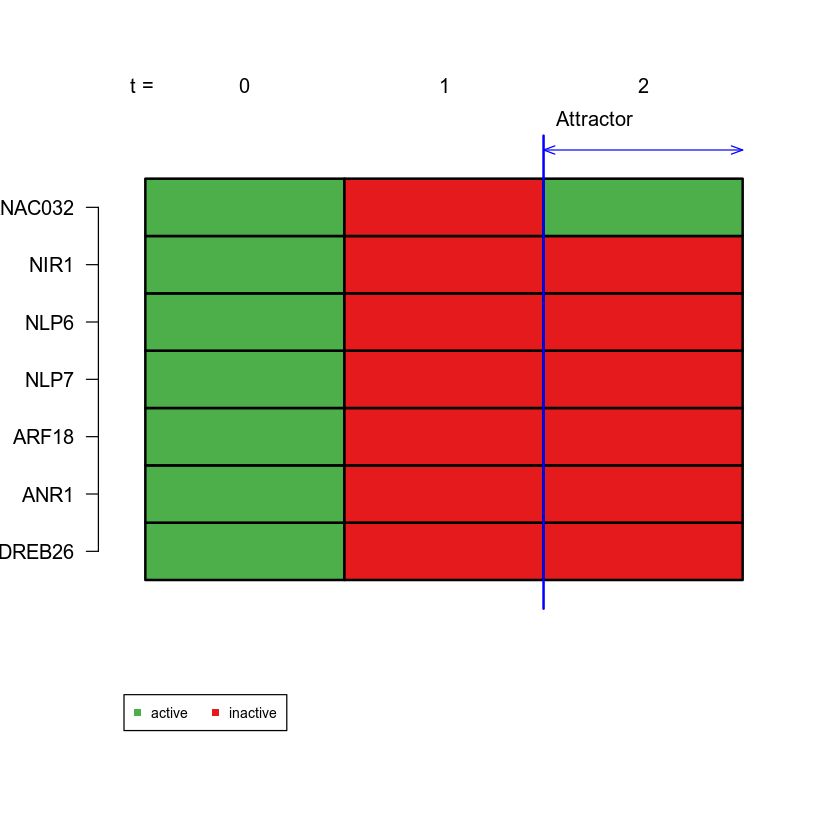

In [58]:
#plot this sequence
plotSequence(sequence=path)

In [59]:
#create LaTeX table file
sequenceToLaTeX(sequence=path, file="indirect_sequence.tex")

,1,2,3
ANAC032,1,0,1
NIR1,1,0,0
NLP6,1,0,0
NLP7,1,0,0
ARF18,1,0,0
ANR1,1,0,0
DREB26,1,0,0


In [60]:
#calculate robustness of the network
robustness = perturbTrajectories(network,
measure="hamming",
numSamples=100,
flipBits=1
)

In [61]:
robustness$value #the lower the more robust

[1] 0.1542857

In [62]:
perturbTrajectories(network, measure="attractor", numSamples=100, flipBits=1)

$stat
  [1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97] FALSE  TRUE  TRUE  TRUE

$value
[1] 0.98